<a href="https://colab.research.google.com/github/T-Naveen-2308/IIITH-FMML-Assignments/blob/main/M3_L2_Implementing_KNN_from_scratch_and_visualize_Algorithm_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementing KNN from scratch and visualize Algorithm performance

---

# **Section 1: Implementing KNN**

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

In [12]:
def predict(X_train, y_train, X_test, k):
    distances = []
    targets = []
    for i in range(len(X_train)):
        distances.append([np.sqrt(np.sum(np.square(X_test - X_train[i, :]))), i])
    distances = sorted(distances)
    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])
    return Counter(targets).most_common(1)[0][0]

In [13]:
def KNN(X_train, y_train, X_test, k):
    assert k <= len(X_train), "[!] K cannot be larger than number of samples."
    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))
    return np.asarray(predictions)

**Note** : If k = 1 then the algorithm will simply return the label of the nearest neighbour. When we give k > 1 the most common label out of the given labels in the k neighbours will be selected.The code for 1 NN is given as follows and does not have to be so complicated.

In [14]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query
  sq = diff * diff
  dist = sq.sum(1)
  label = trainlabel[np.argmin(dist)]
  return label

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [33]:
def accuracy(gtlabel, predlabel):
  assert len(gtlabel) == len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel == predlabel).sum()
  return correct / len(gtlabel)

## Section 1.1 - Iris Dataset
Let's try it out on Iris Dataset present in the scikit learn library

In [16]:
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df["target"] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [68]:
from sklearn.preprocessing import StandardScaler

X = np.array(df.drop(['target'], axis=1))
y = np.array(df['target'])
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [59]:
predictions = KNN(X_train, y_train, X_test, 7)
acc = accuracy(y_test, predictions)
print(f"The accuracy of our classifier is {100*acc}%")

The accuracy of our classifier is 98.0%


In [60]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_knn = KNeighborsClassifier(n_neighbors=3)
sklearn_knn.fit(X_train,y_train)
sklearn_predictions = sklearn_knn.predict(X_test)
acc = accuracy_score(y_test, sklearn_predictions)
print(f"The accuracy of Sklearn classifier is {100*acc}%")

The accuracy of Sklearn classifier is 98.0%


##  Section 1.2: Weighted NN
For KNN, If k is too small, the algorithm would be more sensitive to outliers. If k is too large, then the neighborhood may include too many points from other classes. We also take the label with max votes in the neighbourhood. Another choice can be that instead of giving equal weights to each of the neighbours we can give weighted points in the neighbourhood. So we weigh points by the inverse of their distance. Therefore, closer points will be given a higher priority as compared to the far off points.

An easy way to implement this is by specifying the 'weights' parameter as distance when defining the sklearn KNN function. For more information go through this [site](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [61]:
def predictw(X_train, y_train, X_test, k):
    distances = []
    targets = []
    for i in range(len(X_train)):
        distances.append((np.sqrt(np.sum(np.square(X_test - X_train[i, :]))), i))
    distances = sorted(distances)
    d = {}
    for i in range(k):
        inx = y_train[distances[i][1]]
        if inx not in d:
          d[inx] = 0
        d[inx] += 1/(distances[i][0]+1)
    lis = sorted(list(d.items()), key=lambda x: -x[1])
    return lis[0][0]

In [62]:
def KNNW(X_train, y_train, X_test, k):
    assert k <= len(X_train), "[!] K cannot be larger than number of samples."
    predictions = []
    for i in range(len(X_test)):
        predictions.append(predictw(X_train, y_train, X_test[i, :], k))
    return np.asarray(predictions)

In [63]:
predictions = KNNW(X_train, y_train, X_test, 3)
acc = accuracy(y_test, predictions)
print(f"The accuracy of our classifier is {100*acc}%")

The accuracy of our classifier is 98.0%


# **Section 2: Visualizing Data**  

We will look into something called **Voronoi** diagrams.  

### Voronoi Diagrams  

In simple terms, Voronoi diagrams help you to visualize the dataset by partioning the plane into regions that are close to a given set of points. These regions are also called Voronoi cells.  

Note that the cells/regions depend on the Distance metric being used. One way of interpreting this is by understanding that the distance metric decides the degree to which a 'point' or 'seed' in the Voronoi diagram has influence.  For each seed there is a corresponding region, called a Voronoi cell, consisting of all points of the plane closer to that seed than to any other.

This [link](https://en.wikipedia.org/wiki/Voronoi_diagram#Illustration) provides a wonderful illustration of Voronoi plots for 20 points in two cases: (1) Using Euclidean distance, and (2) Using Manhattan distance.  



Since our Iris data is 4-dimensional (as it has 4 attributes), we need to convert into a form that can be represented in 2-D.   

While there are methods to visualize data higher than 2-dimensions, that is beyond scope for now.  

For simplicity, we just take the first two columns of the iris dataset attributes and observe the Voronoi diagram generated for that.  
Alternatively, one can also perform PCA (Principal Component Analysis), to reduce the 4D data to just two dimensions.

In [91]:
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def voronoi_finite_polygons_2d(vor, radius=None):
    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")
    new_regions = []
    new_vertices = vor.vertices.tolist()
    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]
        if all(v >= 0 for v in vertices):
            new_regions.append(vertices)
            continue
        ridges = all_ridges.get(p1, [])
        new_region = [v for v in vertices if v >= 0]
        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                continue
            t = vor.points[p2] - vor.points[p1]
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])
            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius
            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]
        new_regions.append(new_region.tolist())
    return new_regions, np.asarray(new_vertices)

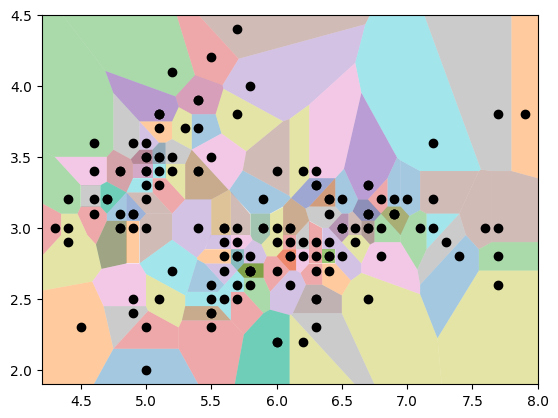

In [45]:
points = []
xpts = np.array(df['sepal length (cm)'])
ypts = np.array(df['sepal width (cm)'])
for i in range(len(xpts)):
  points.append([xpts[i],ypts[i]])
points = np.array(points)
vor = Voronoi(points)
regions, vertices = voronoi_finite_polygons_2d(vor)
for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)
plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)
plt.show()

## Section 2.2: Understanding Decision Boundaries  
So you have seen the Voronoi diagram of the dataset, implemented KNN, and also seen your algorithm's performance in terms of accuracy? Impressive!  
Wouldn't it also be great to know how exactly these 'votes' or neighbours are decided through some kind of visualization?  


### Decision Boundary

While the Voronoi diagram gave us a good idea of the points present in our dataset, to understand how KNN performed on our dataset we can plot decision boundaries. Decision boundaries, as the name suggests, divide the plane into different regions of classification.  

Note that here again, for simplicity, we have only considered first two attributes of the DataFrame (ie, Sepal Length and Sepal Width).  

In [48]:
from matplotlib.colors import ListedColormap
import seaborn as sns

def decision_boundary_plot(x_dec,y_dec,k):
  h = .02
  n = len(set(y_dec))
  cmap_light = ListedColormap(['pink', 'green', 'cyan','yellow'][:n])
  cmap_bold = ['pink', 'darkgreen', 'blue','yellow'][:n]
  for weights in ['uniform', 'distance']:
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
      clf.fit(x_dec, y_dec)

      x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
      y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      plt.figure(figsize=(8, 6))
      plt.contourf(xx, yy, Z, cmap=cmap_light)
      sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                      palette=cmap_bold, alpha=1.0, edgecolor="black")
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.title("Multi-Classification (k = %i, weights = '%s')"% (k, weights))
  plt.show()

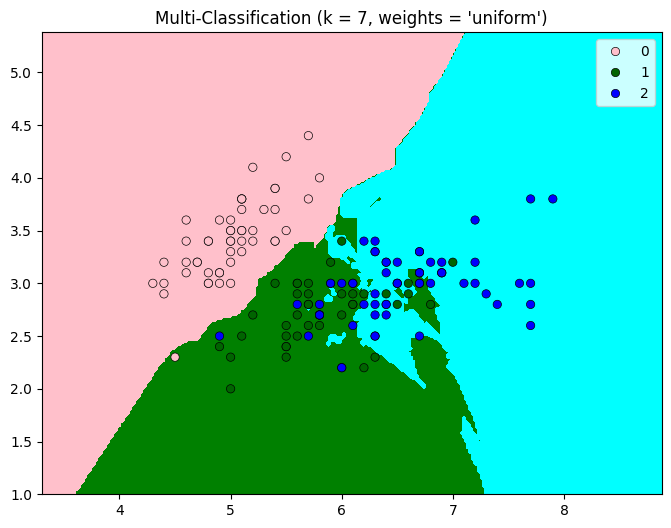

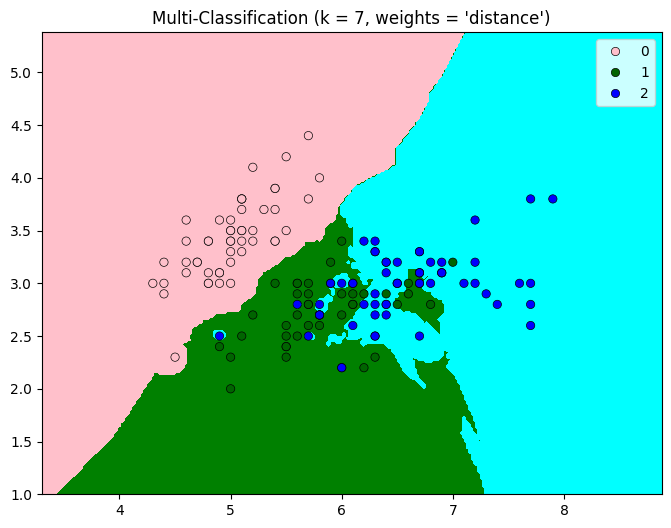

In [53]:
x_pts = X[:,:2]
y_pts = y
decision_boundary_plot(x_pts,y_pts,7)

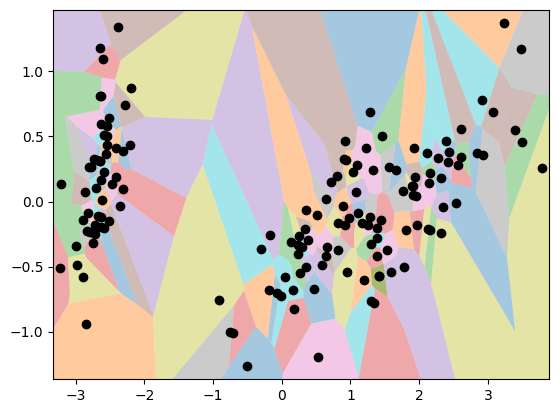

In [69]:
from sklearn.decomposition import PCA

points = []
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
xpts = X_pca[:, 0]
ypts = X_pca[:, 1]
for i in range(len(xpts)):
  points.append([xpts[i],ypts[i]])
points = np.array(points)
vor = Voronoi(points)
regions, vertices = voronoi_finite_polygons_2d(vor)
for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)
plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)
plt.show()

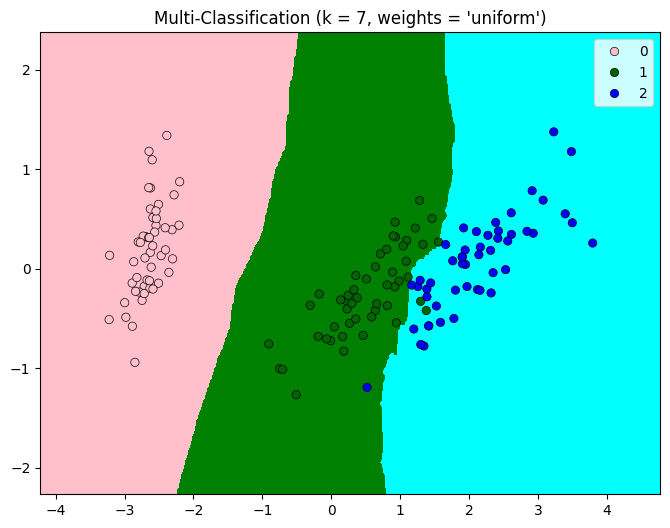

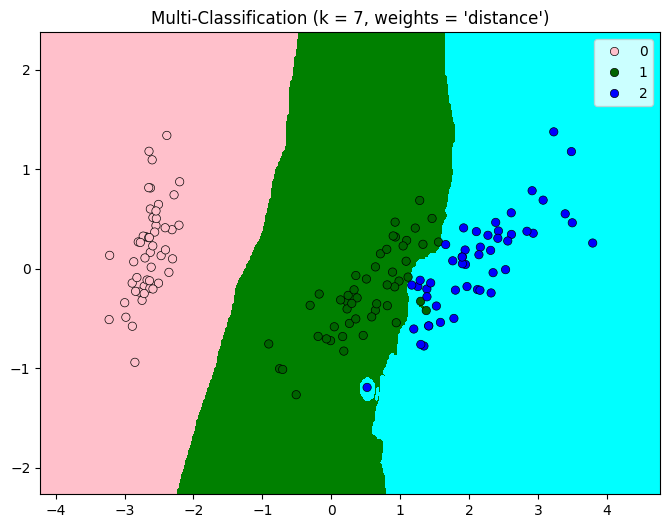

In [70]:
x_pts = X_pca
y_pts = y
decision_boundary_plot(x_pts,y_pts,7)

## Section 2.3: Confusion Matrix  
In classification problems, a confusion matrix, also known as an error matrix, is a table that allows visualization of the performance of an algorithm, typically a supervised learning one. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class.

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
print(confusion_matrix(y_test,predictions))
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

[[13  0  0]
 [ 0 22  0]
 [ 0  1 14]]


Predicted,0,1,2,All
True,,,,
0,13,0,0,13
1,0,22,0,22
2,0,1,14,15
All,13,23,14,50


Text(0.5, 23.52222222222222, 'Predicted label')

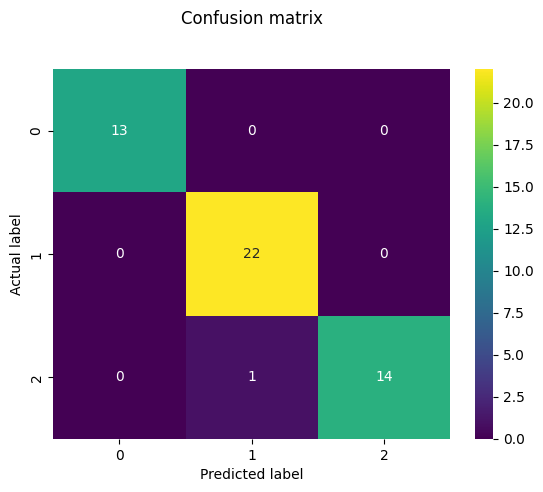

In [73]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Section 2.4: Classification Report

Precision, Recall, and F1-Score are other metrics besides accuracy that one might look for in an algorithm.  Depending on the use-case, one might consider one metric more important than the other.  

Note: *T-> True, F->False, P->Positive, N->Negative*
    
Mathematically, Accuracy is :  

$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$  

**Precision**: The accuracy of positive predictions


$Precision = \frac{TP}{TP+FP}$

**Recall**:Fraction of positives that were correctly identified


$Recall = \frac{TP}{TP+FN}$


**F1-score**: Harmonic mean of precision and recall  


$F1 = \frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN}$  



In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.96      1.00      0.98        22
           2       1.00      0.93      0.97        15

    accuracy                           0.98        50
   macro avg       0.99      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### **Car Evaluation Dataset**

In [76]:
car_df = pd.read_csv('car_evaluation.csv')
car_df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [77]:
from sklearn.preprocessing import LabelEncoder

for x in car_df.columns:
  le = LabelEncoder()
  le.fit(car_df[x])
  car_df[x]=le.transform(car_df[x])
car_df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [78]:
dataset = car_df.values
X = dataset[:,0:6]
y = np.array(dataset[:,6])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [79]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"The accuracy of the classifier on Car evaluation dataset is {100*score:.2f}%")

The accuracy of the classifier on Car evaluation dataset is 89.88%


In [80]:
print(confusion_matrix(y_test,predictions))
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

[[ 56   2  14   0]
 [  9   6   0   0]
 [  3   0 239   0]
 [  5   0   2  10]]


Predicted,0,1,2,3,All
True,,,,,
0,56,2,14,0,72
1,9,6,0,0,15
2,3,0,239,0,242
3,5,0,2,10,17
All,73,8,255,10,346


In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77        72
           1       0.75      0.40      0.52        15
           2       0.94      0.99      0.96       242
           3       1.00      0.59      0.74        17

    accuracy                           0.90       346
   macro avg       0.86      0.69      0.75       346
weighted avg       0.90      0.90      0.89       346



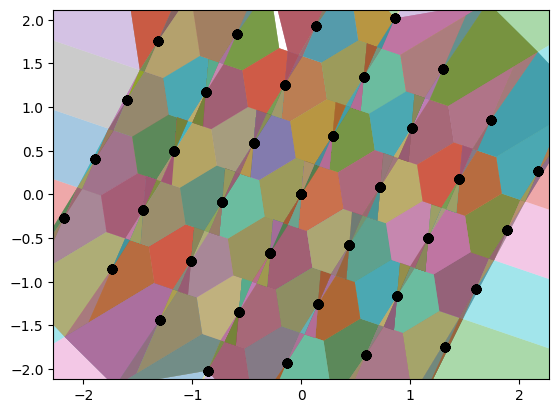

In [92]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

points = []
pca = PCA(n_components=2)
std = StandardScaler()
X_standardised = std.fit_transform(X)
X_pca = pca.fit_transform(X_standardised)
xpts = X_pca[:, 0]
ypts = X_pca[:, 1]
for i in range(len(xpts)):
  points.append([xpts[i],ypts[i]])
points = np.array(points)
vor = Voronoi(points)
regions, vertices = voronoi_finite_polygons_2d(vor)
for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)
plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)
plt.show()

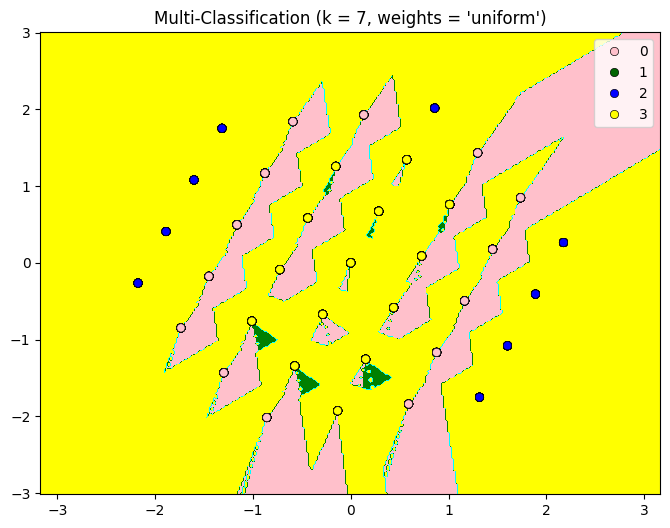

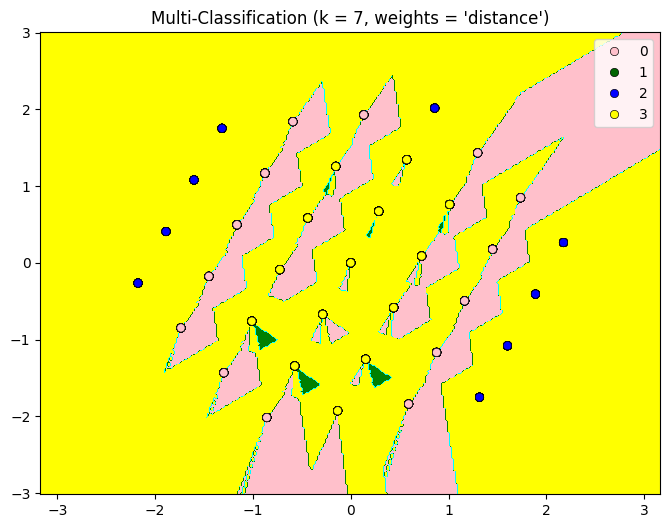

In [93]:
x_pts = X_pca
y_pts = y
decision_boundary_plot(x_pts,y_pts,7)